<a href="https://colab.research.google.com/github/Seblao/R-seaux-Neurones/blob/main/ROC_AUC_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Evaluating Classification Models with ROC AUC
The Titanic data frames describe the survival status of individual passengers on the Titanic.

Source the data from the Kaggle repository here: https://www.kaggle.com/c/titanic/data

Execute the tasks listed below:

* Train 2 classifiers of your choice to, respectively, predict the survival chance of individuals in the dataset and cluster the most "similar" individuals. NB: Apply the required steps up to the model training phase.
* Evaluate the performance of the 2 models using the ROC AUC approach
* Plot the ROC curves using MatPlotLib
* Say which model performed better

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc

from google.colab import files

In [46]:
# Uploade les fichiers un par un depuis ton ordinateur
uploaded = files.upload()

Saving train.csv to train (1).csv
Saving test.csv to test (1).csv
Saving gender_submission.csv to gender_submission (4).csv


In [47]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
gender_df = pd.read_csv('gender_submission.csv')

# Aperçu du jeu d'entraînemt :
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [48]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [49]:
gender_df.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [50]:
train_df.shape

(891, 12)

In [51]:
train_df.shape

(891, 12)

In [52]:
train_df.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [53]:
train_df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [54]:
# Encoder les colonnes ctégorielles :
train_df['Sex'] = train_df['Sex'].map({'male': 0, 'female': 1})
train_df['Embarked'] = train_df['Embarked'].fillna('S')  # Impute les NaN
train_df['Embarked'] = LabelEncoder().fit_transform(train_df['Embarked'])

# Créer 1 v.a 'HasCabin' :
train_df['HasCabin'] = train_df['Cabin'].notnull().astype(int)

# Imputer l’âge (on pourrait aussi utiliser 1 mdèle prédictif) :
train_df['Age'] = SimpleImputer(strategy='median').fit_transform(train_df[['Age']])

# Sélect° des v.a finales :
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'HasCabin']
X = train_df[features]
y = train_df['Survived']

In [56]:
# 2. Split en train/val :
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

In [57]:
# Etude de 2 mdèles :
# Logistic Regress° :
model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train, y_train)
y_proba_lr = model_lr.predict_proba(X_val)[:, 1]

In [37]:
# Random Forest :
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)
y_proba_rf = model_rf.predict_proba(X_val)[:, 1]

In [58]:
# Crbes ROC et AUC :

fpr_lr, tpr_lr, _ = roc_curve(y_val, y_proba_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

fpr_rf, tpr_rf, _ = roc_curve(y_val, y_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

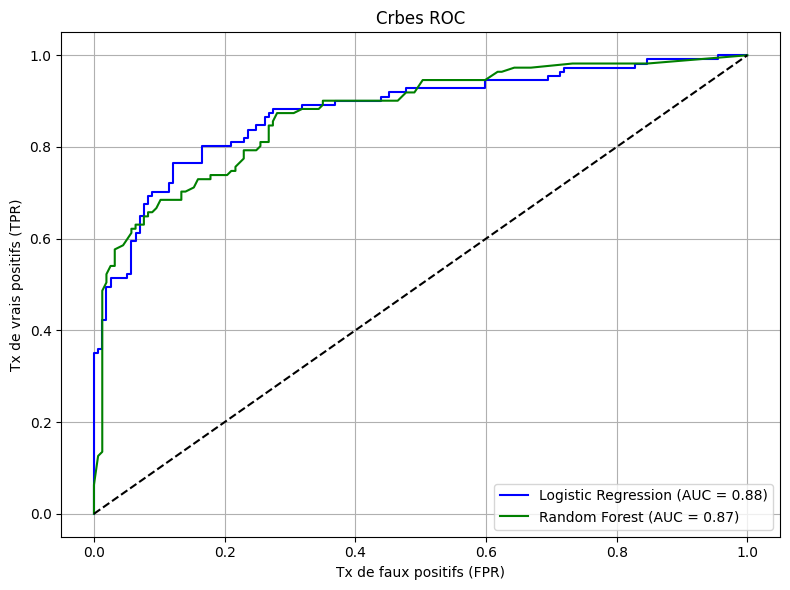

In [59]:
# Affichage :
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})', color='blue')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})', color='green')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Tx de faux positifs (FPR)')
plt.ylabel('Tx de vrais positifs (TPR)')
plt.title('Crbes ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

In [61]:
# Mdèle qui a les meilleurs perfs :

print(f"AUC Logistic Regress° : {roc_auc_lr:.3f}")
print(f"AUC Random Forest       : {roc_auc_rf:.3f}")

if roc_auc_rf > roc_auc_lr:
    print("✅ Le Random Forest a obtenu les meilleures perfs ROC AUC.")
else:
    print("✅ La Régress° Logistiq a obtenu les meilleures perfs ROC AUC.")

AUC Logistic Regress° : 0.879
AUC Random Forest       : 0.873
✅ La Régress° Logistiq a obtenu les meilleures perfs ROC AUC.


Les 2 Modèles sont très proches l'1 de l'autre.